### RNN에 대한 기본 개념을 이해해 보자
- RNN은 이전데이터가 다음 데이터에 영향을 주는 경우 활용 가능
- keras의 SimpleRNN으로 실습해보자

#### char 단위로 학습하기
- 4개의 글자가 들어가면 다음 단어를 맞추는 모델을 만들어보자.
- hello, apple, happy, drink, house
- 사용하는 단어(토큰) 사전 : h e l o a p y d r i n k u s

In [ ]:
import numpy as np

In [ ]:
X = np.array([
  [[1,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,1,0,0,0,0,0,0,0,0,0,0,0],[0,0,1,0,0,0,0,0,0,0,0,0,0,0]],
  [[0,0,0,0,1,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,1,0,0,0,0,0,0,0,0],[0,0,0,0,0,1,0,0,0,0,0,0,0,0],[0,0,1,0,0,0,0,0,0,0,0,0,0,0]],
  [[1,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,1,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,1,0,0,0,0,0,0,0,0],[0,0,0,0,0,1,0,0,0,0,0,0,0,0]],
  [[0,0,0,0,0,0,0,1,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,1,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,1,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,1,0,0,0]],
  [[1,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,1,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,1,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,1]]
])

In [ ]:
y = np.array([
    [0,0,0,1,0,0,0,0,0,0,0,0,0,0],
    [0,1,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,1,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,1,0,0],
    [0,1,0,0,0,0,0,0,0,0,0,0,0,0]
])

In [ ]:
print(X.shape, y.shape)

(5, 4, 14) (5, 14)


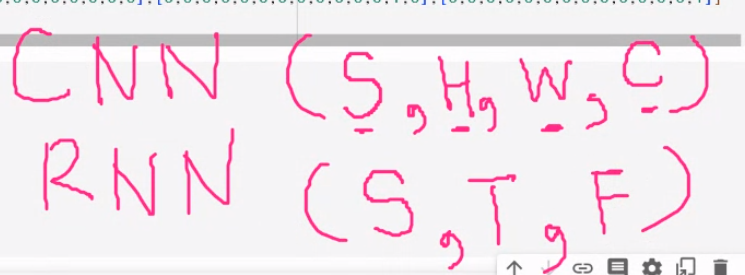

In [ ]:
# S = Sample, H = Height, W = Wdith, C = Color  ,T = Time stamp, F = Feature

### 모델링

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Dense, SimpleRNN

In [ ]:
model = Sequential() # 뼈대 생성
# 입력층
model.add(InputLayer(input_shape=(4,14)))
# 중간층
model.add(SimpleRNN(units=64)) # 활성화 함수 기본 값은 tanh
# 출력층
model.add(Dense(14, activation="softmax"))

In [ ]:
# 학습방법설정
model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
model.fit(X,y,epochs=200)

In [ ]:
# 예측시키기
test =   [[[1,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,1,0,0,0,0,0,0,0,0,0,0,0],[0,0,1,0,0,0,0,0,0,0,0,0,0,0]]]
test_np = np.array(test)
print(test_np.shape)

(1, 4, 14)


In [ ]:
model.predict(test_np)

1/1 [==============================] - 0s 166ms/step


array([[4.0823501e-04, 5.5600732e-04, 4.5112250e-04, 9.9204093e-01,
        4.4182275e-04, 2.8939819e-04, 1.5244657e-03, 6.6760276e-04,
        7.3597662e-04, 8.7619340e-04, 1.1709091e-04, 1.1653368e-03,
        5.1152572e-04, 2.1435603e-04]], dtype=float32)

In [ ]:
y.shape

(5, 14)

### RNN활용 네이버영화 리뷰 데이터 학습하기
- 긍정, 부정(이진분류) 데이터셋

#### 데이터 로딩
- 결측치 제거
- 문제와 답 분리

In [1]:
%cd "/content/drive/MyDrive/Colab Notebooks/딥러닝(JS A)"

/content/drive/MyDrive/Colab Notebooks/딥러닝(JS A)


In [2]:
import pandas as pd

In [3]:
train_df = pd.read_csv("./data/ratings_train.txt", delimiter="\t")
test_df = pd.read_csv("./data/ratings_test.txt", delimiter="\t")

In [4]:
# 결측치 제거
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)

In [5]:
# 문제와 답 분리
X_train = train_df['document']
y_train = train_df['label']
X_test = test_df['document']
y_test = test_df['label']

In [6]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(149995,) (149995,)
(49997,) (49997,)


### 토큰화 및 수치화

In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [8]:
tokenizer = Tokenizer(num_words=5000) # 객체 생성 num_words = x : 빈도가 높은순위부터 x까지만 출력
tokenizer.fit_on_texts(X_train) # 띄어쓰기 중심으로 토큰화 및 단어사전 구축

In [9]:
len(tokenizer.word_index) # 단어사전 길이 확인

296310

In [10]:
tokenizer.word_counts # 단어토큰별 빈도 확인

OrderedDict([('아', 2164),
             ('더빙', 131),
             ('진짜', 6682),
             ('짜증나네요', 18),
             ('목소리', 113),
             ('흠', 190),
             ('포스터보고', 20),
             ('초딩영화줄', 1),
             ('오버연기조차', 1),
             ('가볍지', 17),
             ('않구나', 3),
             ('너무재밓었다그래서보는것을추천한다', 1),
             ('교도소', 4),
             ('이야기구먼', 1),
             ('솔직히', 993),
             ('재미는', 309),
             ('없다', 2019),
             ('평점', 1862),
             ('조정', 11),
             ('사이몬페그의', 1),
             ('익살스런', 2),
             ('연기가', 767),
             ('돋보였던', 23),
             ('영화', 18995),
             ('스파이더맨에서', 1),
             ('늙어보이기만', 1),
             ('했던', 140),
             ('커스틴', 4),
             ('던스트가', 1),
             ('너무나도', 198),
             ('이뻐보였다', 1),
             ('막', 193),
             ('걸음마', 1),
             ('뗀', 2),
             ('3세부터', 1),
             ('초등학교', 55),
             ('1학년생인', 1),
     

In [11]:
X_train_seq = tokenizer.texts_to_sequences(X_train)

In [12]:
X_train_seq[1500]

[61, 195, 29, 1975, 1754]

In [13]:
# 원하는 빈도수의 랭킹 확인하기
df= pd.DataFrame([tokenizer.word_counts.keys(),
                  tokenizer.word_counts.values()]).T
df.columns = ['word', 'count']
df.sort_values(by="count",inplace=True, ascending=False)

In [14]:
df = df.reset_index()

In [16]:
df[df["count"]>5]

,index,word,count
0,23,영화,18995
1,73,너무,8563
2,52,정말,8537
3,2,진짜,6682
4,255,이,5418
...,...,...,...
20660,131718,것이지만,6
20661,26669,생각해보게하는,6
20662,18719,길이길이,6
20663,58784,조선시대,6


In [17]:
# 11354번 랭킹까지만 사용
naver_tokenizer = Tokenizer(num_words=11355)

In [18]:
naver_tokenizer.fit_on_texts(X_train) # 토큰화 및 단어사전 구축

In [19]:
# 수치화
X_train_seq = naver_tokenizer.texts_to_sequences(X_train)

In [20]:
X_train_seq[9000] # 문장에서 나오는 단어별 빈도 순위

[321, 2528, 3104, 804, 4165, 10674, 2556, 10854, 2478, 6148, 1517]

In [21]:
X_test_seq = naver_tokenizer.texts_to_sequences(X_test)

#### 패딩작업
- 리뷰들의 길이가 달라서 순환횟수가 맞지 않아 학습이 불가능
- 모든 순환 횟수를 맞추기 위해 패딩작업 실시
- 0번 토큰으로 채움

In [22]:
from tensorflow.keras.preprocessing import sequence
import numpy as np

In [23]:
# maxlen을 선택하기 위해 통계치 확인 (최대, 최소, 평균, 중앙)
X_train_len = [len(doc) for doc in X_train_seq]
print("최대값 : ", max(X_train_len))
print("최소값 : ", min(X_train_len))
print("평균값 : ", np.mean(X_train_len))
print("중앙값 : ", np.median(X_train_len))

최대값 :  54
최소값 :  0
평균값 :  4.9490983032767755
중앙값 :  4.0


In [24]:
# maxlen보다 긴 시퀀스는 잘라버리고, 짧은 시퀀스는 0을 채워서 맞춰준다
X_train_seq_pad = sequence.pad_sequences(X_train_seq, maxlen = 15)
X_test_seq_pad = sequence.pad_sequences(X_test_seq, maxlen = 15)

In [63]:
print(X_train_seq_pad.shape, X_test_seq_pad.shape)

(149995, 7) (49997, 7)


In [64]:
X_train_seq_pad[15000]

array([   0,    0,    0,    0,    0, 2796, 1102], dtype=int32)

In [25]:
# reshape를 이용해 데이터의 feature 숫자 표현
X_train_seq_pad = X_train_seq_pad.reshape(-1,15,1)
X_test_seq_pad = X_test_seq_pad.reshape(-1,15,1)

In [26]:
print(X_train_seq_pad.shape, X_test_seq_pad.shape)

(149995, 15, 1) (49997, 15, 1)


### 모델링

In [27]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Dense, SimpleRNN

In [76]:
model = Sequential() # 뼈대 만들기
# 입력층
model.add(InputLayer(input_shape=(7,1)))
# 중간층
model.add(SimpleRNN(units=128)) # 활성화 함수 기본 값은 tanh
# 출력층
model.add(Dense(1, activation="sigmoid")) # 이진분류는 1 , 다중분류는 클래스의 갯수

In [77]:
# 모델의 학습방법 및 평가방법 설정
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=["accuracy"])

In [78]:
h1 = model.fit(X_train_seq_pad, y_train,
              validation_split = 0.2,
               epochs=20, batch_size = 128)

Epoch 1/20
938/938 [==============================] - 17s 16ms/step - loss: 0.6943 - accuracy: 0.5155 - val_loss: 0.6932 - val_accuracy: 0.5204
Epoch 2/20
938/938 [==============================] - 14s 15ms/step - loss: 0.6926 - accuracy: 0.5192 - val_loss: 0.6910 - val_accuracy: 0.5060
Epoch 3/20
938/938 [==============================] - 12s 13ms/step - loss: 0.6925 - accuracy: 0.5179 - val_loss: 0.6901 - val_accuracy: 0.5346
Epoch 4/20
938/938 [==============================] - 16s 17ms/step - loss: 0.6919 - accuracy: 0.5208 - val_loss: 0.6919 - val_accuracy: 0.5261
Epoch 5/20
938/938 [==============================] - 16s 17ms/step - loss: 0.6919 - accuracy: 0.5217 - val_loss: 0.6908 - val_accuracy: 0.5034
Epoch 6/20
938/938 [==============================] - 12s 13ms/step - loss: 0.6909 - accuracy: 0.5228 - val_loss: 0.6912 - val_accuracy: 0.5345
Epoch 7/20
938/938 [==============================] - 13s 14ms/step - loss: 0.6913 - accuracy: 0.5241 - val_loss: 0.6938 - val_accuracy:

In [ ]:
# num_words를 수정해서 성능 개선 , 데이터셋에 대한 문제, 사용하고있는 수치화 기법이 단순하기때문에 수치화 방법의 변경도 있음 = > 워드 임베딩 (자연어처리)
# 자연어처리에서는 단어에 대한 빈도가 많으면 많을 수록 좋음

#### LSTM 레이어 활용하기
- 기본 RNN은 시퀀스 길이가 길어지면 기울기 소실문제가 발생
- 바로 직전의 단어만 예측에 영향을 주는게 아니라 초반에 입력된 단어가 영향을 주는 경우 기본 RNN으로 해결하기 어렵다
- 장기/단기 기억의 가중치를 관리하는 LSTM을 사용해보자

In [30]:
from tensorflow.keras.layers import LSTM

In [80]:
model2 = Sequential() # 뼈대 만들기
# 입력층
model2.add(InputLayer(input_shape=(7,1)))
# 중간층
model2.add(LSTM(units=128)) # 활성화 함수 기본 값은 tanh
# 출력층
model2.add(Dense(1, activation="sigmoid")) # 이진분류는 1 , 다중분류는 클래스의 갯수

In [81]:
# 모델의 학습방법 및 평가방법 설정
model2.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=["accuracy"])

In [82]:
h1 = model2.fit(X_train_seq_pad, y_train,
              validation_split = 0.2,
               epochs=20, batch_size = 128)

Epoch 1/20
938/938 [==============================] - 35s 34ms/step - loss: 0.6913 - accuracy: 0.5272 - val_loss: 0.6896 - val_accuracy: 0.5350
Epoch 2/20
938/938 [==============================] - 34s 36ms/step - loss: 0.6906 - accuracy: 0.5296 - val_loss: 0.6893 - val_accuracy: 0.5341
Epoch 3/20
938/938 [==============================] - 32s 34ms/step - loss: 0.6901 - accuracy: 0.5310 - val_loss: 0.6889 - val_accuracy: 0.5351
Epoch 4/20
938/938 [==============================] - 30s 32ms/step - loss: 0.6899 - accuracy: 0.5294 - val_loss: 0.6884 - val_accuracy: 0.5390
Epoch 5/20
938/938 [==============================] - 35s 37ms/step - loss: 0.6895 - accuracy: 0.5341 - val_loss: 0.6882 - val_accuracy: 0.5399
Epoch 6/20
938/938 [==============================] - 31s 33ms/step - loss: 0.6890 - accuracy: 0.5365 - val_loss: 0.6888 - val_accuracy: 0.5382
Epoch 7/20
938/938 [==============================] - 31s 33ms/step - loss: 0.6886 - accuracy: 0.5358 - val_loss: 0.6880 - val_accuracy:

#### 워드 임베딩
- 단어의 표현을 밀집된 실수형태로 표현하는 방법
- 학습을 통해서 각 단어의 수치값을 정밀하게 만든다

In [28]:
from tensorflow.keras.layers import Embedding

In [31]:
model3 = Sequential() # 뼈대 만들기
# 입력층
model3.add(Embedding(11355,50)) # 사용하는 단어사전의 수, 한 단어를 표현할 숫자의 수
# 중간층
model3.add(LSTM(units=128)) # 활성화 함수 기본 값은 tanh
# 출력층
model3.add(Dense(1, activation="sigmoid")) # 이진분류는 1 , 다중분류는 클래스의 갯수

In [32]:
# 모델의 학습방법 및 평가방법 설정
model3.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=["accuracy"])

In [33]:
h1 = model3.fit(X_train_seq_pad, y_train,
              validation_split = 0.2,
               epochs=20, batch_size = 128)

Epoch 1/20
938/938 [==============================] - 48s 43ms/step - loss: 0.4449 - accuracy: 0.7736 - val_loss: 0.4013 - val_accuracy: 0.8038
Epoch 2/20
938/938 [==============================] - 12s 13ms/step - loss: 0.3676 - accuracy: 0.8180 - val_loss: 0.3958 - val_accuracy: 0.8082
Epoch 3/20
938/938 [==============================] - 9s 10ms/step - loss: 0.3399 - accuracy: 0.8329 - val_loss: 0.4082 - val_accuracy: 0.8051
Epoch 4/20
938/938 [==============================] - 8s 9ms/step - loss: 0.3120 - accuracy: 0.8458 - val_loss: 0.4305 - val_accuracy: 0.7994
Epoch 5/20
938/938 [==============================] - 9s 9ms/step - loss: 0.2858 - accuracy: 0.8567 - val_loss: 0.4592 - val_accuracy: 0.7976
Epoch 6/20
938/938 [==============================] - 8s 8ms/step - loss: 0.2608 - accuracy: 0.8678 - val_loss: 0.5139 - val_accuracy: 0.7926
Epoch 7/20
938/938 [==============================] - 8s 9ms/step - loss: 0.2385 - accuracy: 0.8781 - val_loss: 0.5761 - val_accuracy: 0.7903
E

### 추가 실습
1. 사용하는 단어사전의 수 늘려보기
2. 형태소 분석기 활용해보기

In [34]:
! pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 56.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 47.0 MB/s eta 0:00:00


In [43]:
from konlpy.tag import Okt # 트위터에서 만든 한국어 형태소 처리기
# 형태소로 쪼개진 리스트를 pickle로 저장
import pickle # 파이썬에 존재하는 모든 데이터 타입을 파일로 저장
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
okt = Okt()

In [49]:
with open('/content/drive/MyDrive/Colab Notebooks/딥러닝(JS A)/data/X_train.morphs.pkl', "rb") as f :
  X_train_morphs = pickle.load(f) # 파일로딩

In [ ]:
X_train_morphs

In [53]:
naver_tokenizer.fit_on_texts(X_train_morphs) # 토큰화 및 단어사전 구축
# 수치화
X_train_seq = naver_tokenizer.texts_to_sequences(X_train_morphs)
X_train_seq_pad = sequence.pad_sequences(X_train_seq, maxlen = 15)
X_train_seq_pad = X_train_seq_pad.reshape(-1,15,1)

In [54]:
model4 = Sequential() # 뼈대 만들기
# 입력층
model4.add(Embedding(11355,50)) # 사용하는 단어사전의 수, 한 단어를 표현할 숫자의 수
# 중간층
model4.add(LSTM(units=128)) # 활성화 함수 기본 값은 tanh
# 출력층
model4.add(Dense(1, activation="sigmoid")) # 이진분류는 1 , 다중분류는 클래스의 갯수

In [55]:
# 모델의 학습방법 및 평가방법 설정
model4.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=["accuracy"])

In [57]:
h1 = model4.fit(X_train_seq_pad, y_train,
              validation_split = 0.2,
               epochs=20, batch_size = 128)

Epoch 1/20
938/938 [==============================] - 41s 40ms/step - loss: 0.4042 - accuracy: 0.8121 - val_loss: 0.3591 - val_accuracy: 0.8424
Epoch 2/20
938/938 [==============================] - 11s 12ms/step - loss: 0.3300 - accuracy: 0.8540 - val_loss: 0.3515 - val_accuracy: 0.8456
Epoch 3/20
938/938 [==============================] - 10s 11ms/step - loss: 0.2983 - accuracy: 0.8677 - val_loss: 0.3510 - val_accuracy: 0.8444
Epoch 4/20
938/938 [==============================] - 7s 8ms/step - loss: 0.2701 - accuracy: 0.8798 - val_loss: 0.3675 - val_accuracy: 0.8452
Epoch 5/20
938/938 [==============================] - 9s 10ms/step - loss: 0.2421 - accuracy: 0.8927 - val_loss: 0.4037 - val_accuracy: 0.8408
Epoch 6/20
938/938 [==============================] - 8s 8ms/step - loss: 0.2152 - accuracy: 0.9066 - val_loss: 0.4428 - val_accuracy: 0.8355
Epoch 7/20
938/938 [==============================] - 8s 9ms/step - loss: 0.1908 - accuracy: 0.9179 - val_loss: 0.4767 - val_accuracy: 0.8276